# WattsUp - Transformando cada watt em economia!

## Descrição do Projeto
**WattsUp** é um aplicativo desenvolvido para monitorar e controlar o consumo de energia de cada eletrodoméstico em uma residência. Ele permite visualizar o gasto energético em tempo real e o custo estimado de cada dispositivo na conta de luz. Nossa solução visa promover a eficiência energética e ajudar os usuários a economizar dinheiro e preservar o meio ambiente.

## Funcionalidades
- Monitoramento em tempo real do consumo de energia.
- Cálculo automático do custo de energia para cada eletrodoméstico.
- Interface amigável para controle e visualização dos dados.
- Relatórios detalhados para ajudar os usuários a entender e reduzir seus gastos.

## Integrantes do Projeto
- **Juan Pinheiro**  
  RM: 552202  
- **Bruno Caputo**  
  RM: 558303

---  


# Instalação de Bibliotecas

Este código utiliza diversas bibliotecas para análise de dados, visualização gráfica e modelagem preditiva. Abaixo estão listadas as bibliotecas necessárias e os comandos para instalá-las em seu ambiente de desenvolvimento.

## Bibliotecas Necessárias

Para garantir que você tenha todas as dependências instaladas, execute o seguinte comando no seu terminal:

```bash
pip install pandas numpy matplotlib seaborn plotly scikit-learn scipy
```

## Alternativa para Jupyter Notebooks

Se você estiver utilizando um notebook Jupyter, pode instalar as bibliotecas diretamente em uma célula com o seguinte comando:

```python
!pip install pandas numpy matplotlib seaborn plotly scikit-learn scipy
```

# Importando as Bibliotecas Necessárias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy import stats

# Questões:

1. **Como as emissões de carbono variam ao longo do tempo?**  

2. **Quais setores contribuem mais para as emissões de carbono ao longo do tempo?**  

3. **Quais países têm a maior taxa de crescimento nas emissões de carbono?**  

4. **Quais fatores influenciam mais fortemente as emissões de carbono?**  

5. **Qual é a correlação entre as emissões de carbono e outros indicadores econômicos?**  

6. **É possível prever a pegada de carbono futura com base nos dados históricos?**  

7. **Há uma relação entre os países com maior emissões e sua dependência de fontes de energia específicas?**  

8. **Quais setores têm o maior potencial de redução nas emissões de carbono?**  

9. **Os países que mais emitem carbono também apresentam um alto nível de desigualdade nas emissões entre setores?**  

10. **Como os países podem ser classificados em categorias com base nas suas emissões de carbono (baixas, médias, altas)?**  


## Conjuntos de Dados

### 1. **Dataset.csv** – Emissões de CO₂ por País e Setor

Este conjunto de dados fornece informações detalhadas sobre as emissões de CO₂ em diferentes países e setores ao longo do tempo. Ele permite explorar as emissões totais de CO₂, bem como as divisões setoriais (por exemplo, transporte, indústria e outros setores). A análise temporal pode ser realizada para prever as emissões futuras, ajudando pesquisadores e formuladores de políticas a entenderem melhor as tendências globais.

#### Principais Características:
- **Emissões Totais de CO₂** por país.
- **Emissões por Setor** (transportes, indústria, etc.).
- **Análise Temporal**: permite a realização de análise de séries temporais para prever emissões futuras.
- **Objetivo**: Compreender a contribuição dos setores para as emissões totais de CO₂ e os padrões temporais globais.

#### Usos:
- Pesquisa sobre tendências globais de emissões.
- Análises sobre políticas públicas de redução de emissões.
- Identificação de setores críticos para políticas de mitigação.

---

### 2. **GCB2022v27_MtCO2_flat.csv** – Emissões de CO₂ por País e Fonte

Este conjunto de dados fornece uma visão detalhada das emissões de CO₂ por país, incluindo as contribuições específicas de fontes como carvão, petróleo, gás, produção de cimento e flaring. Além disso, oferece uma métrica de emissões per capita por país. Ele é essencial para entender quais países estão liderando as emissões de CO₂ e onde os esforços de redução de emissões devem ser priorizados.

#### Principais Características:
- **Emissões Totais de CO₂** por país.
- **Emissões por Fonte**: carvão, petróleo, gás, cimento e flaring.
- **Emissões Per Capita**: detalhamento das emissões por habitante.
- **Análise Comparativa**: permite comparar os principais emissores de CO₂ globalmente e identificar padrões de poluição.

#### Usos:
- Análise sobre os maiores emissores de CO₂ globalmente.
- Identificação de países com as maiores emissões per capita.
- Definição de prioridades para políticas de redução de emissões.

---

# Análise de Emissões de CO₂: Brasil e Principais Emissores

Este código realiza uma análise detalhada das emissões de CO₂ de diversos países, com um foco especial no Brasil e em outros grandes emissores globais. Abaixo, descrevo as etapas do código e o que cada uma realiza.

## Fonte dos Dados

Os dados utilizados para esta análise foram obtidos no [Kaggle - Global Fossil CO₂ Emissions by Country (2002-2022)](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022)

---

## Carregar o Arquivo CSV

O primeiro passo é carregar o arquivo CSV contendo os dados de emissões de CO₂. O código abaixo carrega o arquivo:

```python
df = pd.read_csv('Data/GCB2022v27_MtCO2_flat.csv')


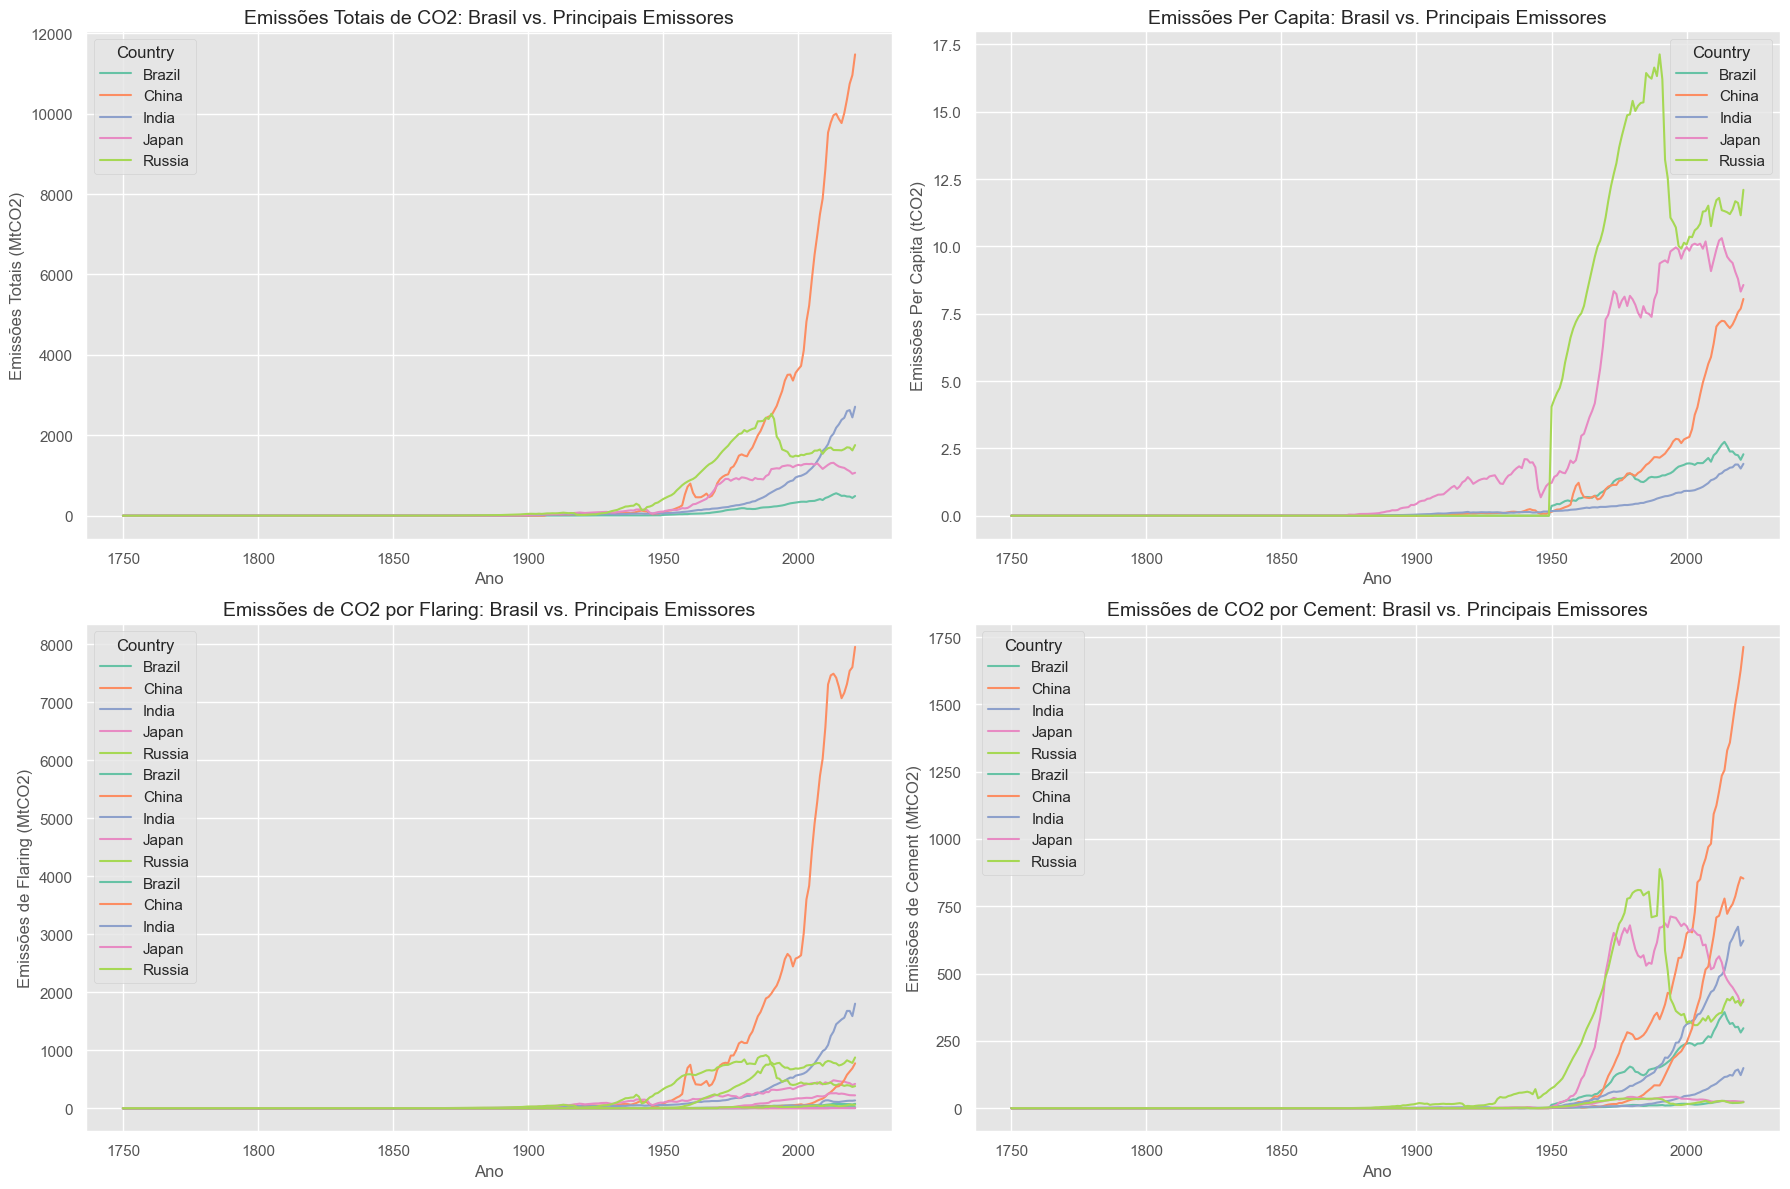

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv('Data/GCB2022v27_MtCO2_flat.csv')

# Tratar dados ausentes
df.fillna(0, inplace=True)

# Filtrar os dados para países específicos (Brasil e os maiores emissores)
paises_interesse = ['Brazil', 'China', 'United States', 'India', 'Russia', 'Japan']
df_selecionados = df[df['Country'].isin(paises_interesse)]

# Criar uma grade de subgráficos (2 linhas, 2 colunas)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 1: Comparação de emissões totais (Brasil e principais emissores)
sns.lineplot(data=df_selecionados, x='Year', y='Total', hue='Country', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Emissões Totais de CO2: Brasil vs. Principais Emissores', fontsize=14)
axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('Emissões Totais (MtCO2)')
axes[0, 0].grid(True)

# Gráfico 2: Comparação de emissões por fonte (Brasil e principais emissores)
fontes = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']
for idx, fonte in enumerate(fontes):
    sns.lineplot(data=df_selecionados, x='Year', y=fonte, hue='Country', palette='Set2', ax=axes[1, idx % 2])
    axes[1, idx % 2].set_title(f'Emissões de CO2 por {fonte}: Brasil vs. Principais Emissores', fontsize=14)
    axes[1, idx % 2].set_xlabel('Ano')
    axes[1, idx % 2].set_ylabel(f'Emissões de {fonte} (MtCO2)')
    axes[1, idx % 2].grid(True)

# Gráfico 3: Comparação de emissões per capita (Brasil vs. principais emissores)
sns.lineplot(data=df_selecionados, x='Year', y='Per Capita', hue='Country', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Emissões Per Capita: Brasil vs. Principais Emissores', fontsize=14)
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('Emissões Per Capita (tCO2)')
axes[0, 1].grid(True)

# Ajustar o layout
plt.tight_layout()
plt.show()


# Análise de Emissões de CO₂: Emissões de CO₂ por País e Setor

Este código realiza uma análise detalhada das emissões de CO₂ em diferentes países e setores, com um foco especial no Brasil e outros grandes emissores. Além disso, o código explora séries temporais de emissões e investiga as correlações entre variáveis.

## Base de Dados Utilizada

Os dados utilizados para esta análise foram obtidos no [Kaggle - CO2 Emissions by Sectors](https://www.kaggle.com/datasets/saloni1712/co2-emissions).

---

## Carregar o Arquivo CSV

O primeiro passo é carregar o arquivo CSV com os dados de emissões de CO₂. O código abaixo carrega o arquivo e prepara os dados para análise:

```python
df = pd.read_csv('Data/dataset.csv')


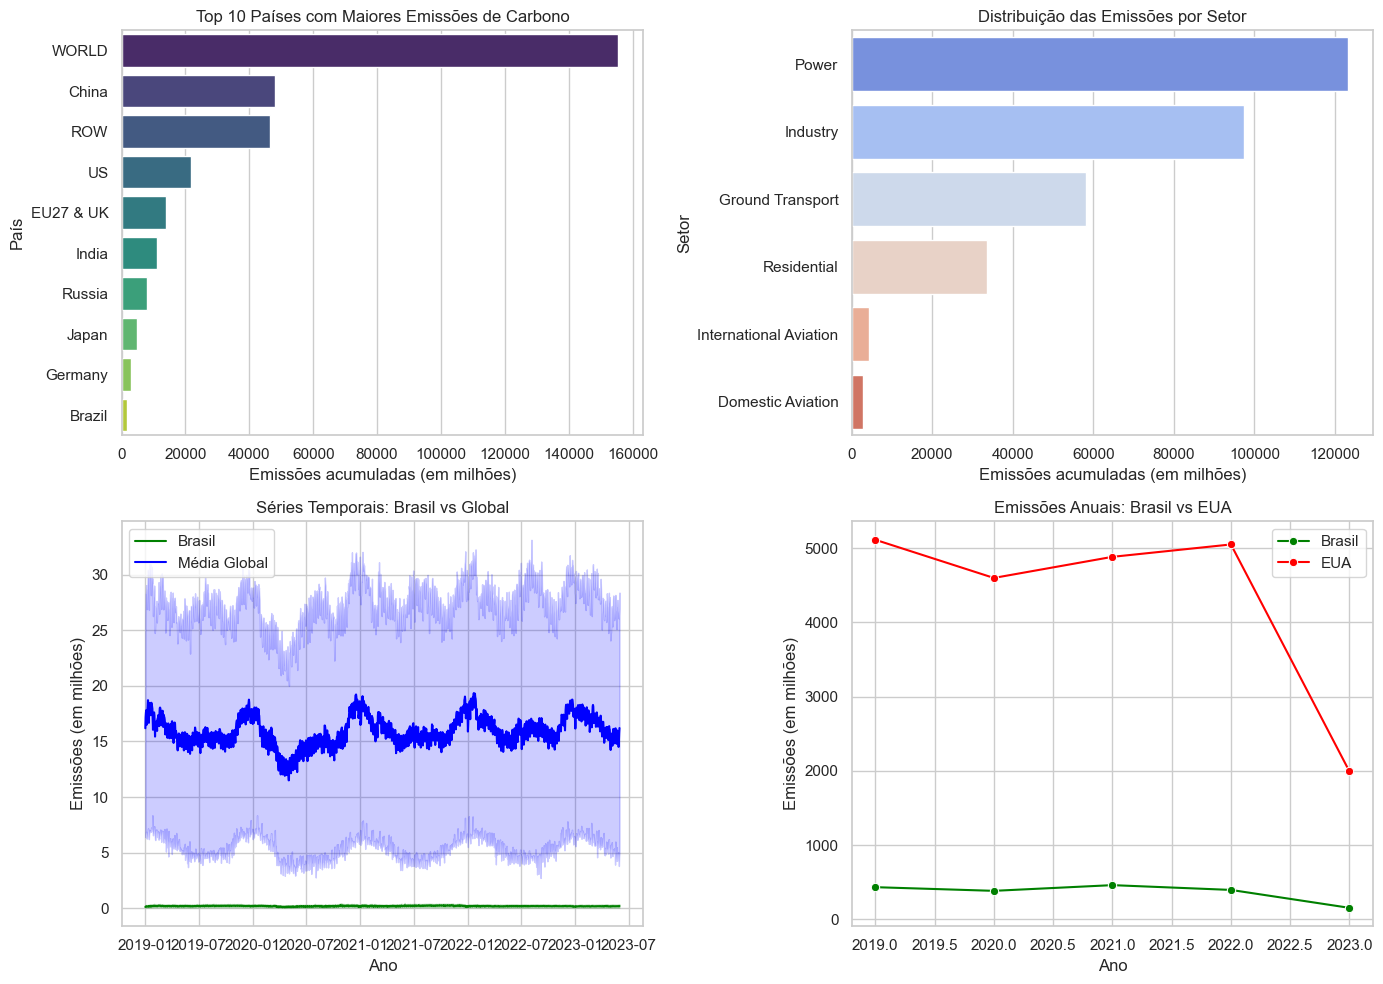

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('Data/dataset.csv')

# Pré-processamento dos dados
df['date'] = pd.to_datetime(df['timestamp'], unit='s')  # Convertendo timestamp para data
df['year'] = df['date'].dt.year  # Extraindo o ano
df.dropna(inplace=True)  # Removendo valores nulos

# Análise por país: Top 10 países com maiores emissões acumuladas
emissoes_por_pais = df.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Análise por setor: Emissões acumuladas
emissoes_por_setor = df.groupby('sector')['value'].sum().sort_values(ascending=False)

# Gráficos organizados em uma grade 2x2, mas apenas 2 gráficos por linha
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Top 10 países com maiores emissões acumuladas
sns.barplot(x=emissoes_por_pais.values, y=emissoes_por_pais.index, hue=emissoes_por_pais.index, palette='viridis', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Top 10 Países com Maiores Emissões de Carbono')
axes[0, 0].set_xlabel('Emissões acumuladas (em milhões)')
axes[0, 0].set_ylabel('País')

# Gráfico 2: Distribuição das emissões por setor
sns.barplot(x=emissoes_por_setor.values, y=emissoes_por_setor.index, hue=emissoes_por_setor.index, palette='coolwarm', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Distribuição das Emissões por Setor')
axes[0, 1].set_xlabel('Emissões acumuladas (em milhões)')
axes[0, 1].set_ylabel('Setor')

# Séries temporais: Brasil vs Média Global
brasil = df[df['country'] == 'Brazil']
global_ = df[df['country'] == 'WORLD']

sns.lineplot(data=brasil, x='date', y='value', label='Brasil', color='green', ax=axes[1, 0])
sns.lineplot(data=global_, x='date', y='value', label='Média Global', color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Séries Temporais: Brasil vs Global')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Emissões (em milhões)')
axes[1, 0].legend()

# Análise anual: Emissões do Brasil vs EUA
brasil_anual = brasil.groupby('year')['value'].sum()
eua = df[df['country'] == 'US'].groupby('year')['value'].sum()

sns.lineplot(data=brasil_anual, label='Brasil', color='green', marker='o', ax=axes[1, 1])
sns.lineplot(data=eua, label='EUA', color='red', marker='o', ax=axes[1, 1])
axes[1, 1].set_title('Emissões Anuais: Brasil vs EUA')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Emissões (em milhões)')
axes[1, 1].legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir gráficos
plt.show()


# Análise da Pegada de Carbono

O código realiza as seguintes etapas:

### 1. **Análise Exploratória Multimodal**
   - **Gráfico de Emissões Totais por País**: Exibe os 10 países com as maiores emissões totais de carbono.
   - **Distribuição das Fontes de Emissão**: Cria um gráfico de pizza mostrando a contribuição de diferentes fontes de emissão (Carvão, Petróleo, Gás, Cimento e Flaring).
   - **Emissões Per Capita**: Exibe as emissões médias per capita nos 10 países com maior emissão.
   - **Boxplot de Emissões por Setor**: Apresenta a variação das emissões por setor em um gráfico de caixa.

### 2. **Modelagem Preditiva Avançada**
   - **Previsão de Emissões**: Aplica diversos modelos de regressão (Linear, Ridge, Lasso, Random Forest, Gradient Boosting, e SVR) para prever as emissões totais.
   - **Avaliação de Modelos**: Compara os modelos com base em métricas como MSE, R2 e MAE.
   - **Importância das Variáveis**: Exibe a importância das variáveis para a previsão das emissões usando Random Forest.

### 3. **Análise Temporal Profunda**
   - **Tendência das Emissões**: Exibe gráficos de séries temporais para os 5 países com mais dados, mostrando as tendências de emissões ao longo do tempo.
   - **Regressão Polinomial**: Aplica uma regressão polinomial para identificar tendências e prever as emissões futuras de um país.

## Objetivo

O código visa fornecer uma análise completa da pegada de carbono, avaliando as emissões por diferentes países, fontes e setores, além de utilizar modelos preditivos para entender e projetar o comportamento futuro das emissões.

---


 Análise Pegada de Carbono

 Análise Exploratória Multimodal:



 Modelagem Preditiva:



 Análise Temporal:


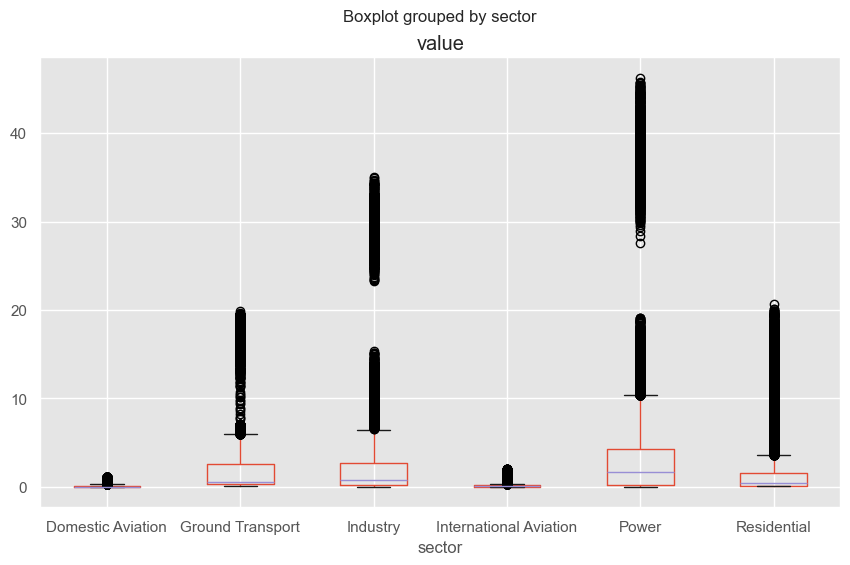

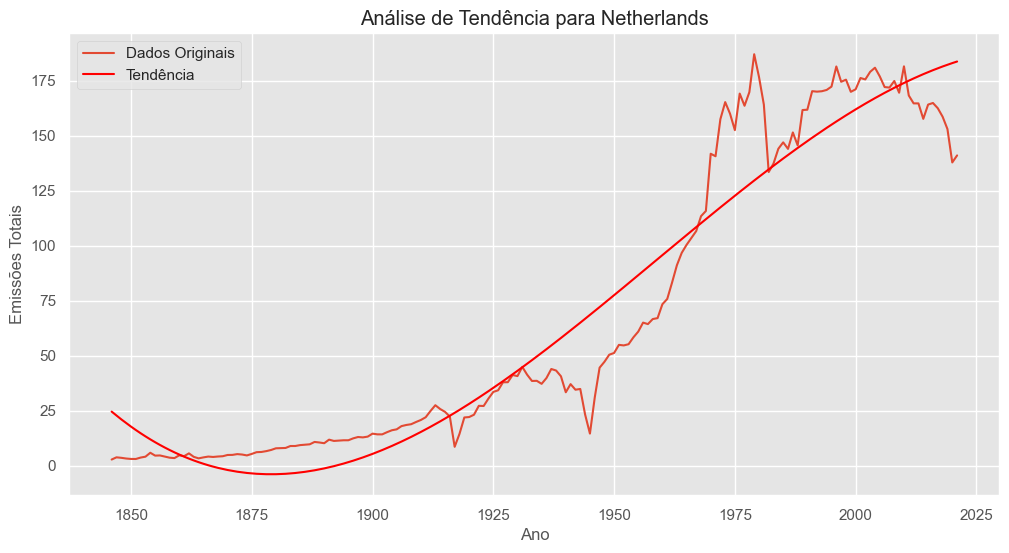

In [46]:
class AnalisePegadaCarbonoPro:
    def __init__(self, caminho_dataset1, caminho_dataset2):
        # Carregamento dos datasets
        self.df_setores = self._carregar_preparar_dados(caminho_dataset1, 'setores')
        self.df_fontes = self._carregar_preparar_dados(caminho_dataset2, 'fontes')
        
        plt.style.use('ggplot')
        
    def _carregar_preparar_dados(self, caminho, tipo='setores'):
        try:
            df = pd.read_csv(caminho)
            
            if tipo == 'setores':
                # Tratamentos para dataset de setores
                df.dropna(subset=['country', 'sector', 'value'], inplace=True)
                df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
                df['year'] = df['timestamp'].dt.year
            
            elif tipo == 'fontes':
                # Tratamentos para dataset de fontes
                colunas_interesse = [
                    'Country', 'Year', 'Total', 
                    'Coal', 'Oil', 'Gas', 
                    'Cement', 'Flaring', 'Per Capita'
                ]
                
                colunas_existentes = [col for col in colunas_interesse if col in df.columns]
                df = df[colunas_existentes]
                
                df.dropna(inplace=True)
            
            return df
        
        except Exception as e:
            print(f"Erro no carregamento dos dados ({tipo}): {e}")
            return None
    
    def analise_exploratoria_multimodal(self):
        # 1. Análise de Distribuição de Emissões
        fig = make_subplots(
            rows=2, cols=2, 
            subplot_titles=(
                'Top 10 Países - Emissões Totais', 
                'Distribuição de Emissões por Fonte',
                'Emissões Per Capita', 
                'Boxplot de Emissões por Setor'
            ),
            specs=[[{'type': 'xy'}, {'type': 'domain'}], [{'type': 'xy'}, {'type': 'xy'}]]
        )
        
        # Top 10 Países
        top_paises = self.df_fontes.groupby('Country')['Total'].sum().nlargest(10)
        fig.add_trace(
            go.Bar(x=top_paises.index, y=top_paises.values, name='Emissões Totais'),
            row=1, col=1
        )
        
        # Distribuição de Emissões por Fonte
        fontes = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring']
        emissoes_por_fonte = self.df_fontes[fontes].sum()
        fig.add_trace(
            go.Pie(
                labels=emissoes_por_fonte.index, 
                values=emissoes_por_fonte.values, 
                name='Fontes de Emissão'
            ),
            row=1, col=2
        )
        
        # Emissões Per Capita Top 10
        top_paises_per_capita = self.df_fontes.groupby('Country')['Per Capita'].mean().nlargest(10)
        fig.add_trace(
            go.Bar(x=top_paises_per_capita.index, y=top_paises_per_capita.values, name='Emissões Per Capita'),
            row=2, col=1
        )
        
        # Boxplot de Emissões por Setor
        boxplot_setores = self.df_setores.boxplot(column='value', by='sector')
        fig.add_trace(
            go.Box(y=boxplot_setores.get_lines()[0].get_ydata(), name='Emissões por Setor'),
            row=2, col=2
        )
        
        fig.update_layout(height=800, title_text="Análise Emissões de Carbono")
        fig.show()
    
    def modelagem_preditiva_avancada(self):
        # Preparação dos dados
        df_ml = self.df_fontes.copy()
        
        # Encoding de países
        le = LabelEncoder()
        df_ml['Country_Encoded'] = le.fit_transform(df_ml['Country'])
        
        # Seleção de features
        features = ['Year', 'Country_Encoded', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring']
        X = df_ml[features]
        y_total = df_ml['Total']
        y_per_capita = df_ml['Per Capita']
        
        # Divisão treino-teste
        X_train, X_test, y_train, y_test = train_test_split(X, y_total, test_size=0.2, random_state=42)
        
        modelos = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(),
            'Lasso Regression': Lasso(),
            'Random Forest': RandomForestRegressor(n_estimators=100),
            'Gradient Boosting': GradientBoostingRegressor(),
            'SVR': SVR(kernel='rbf')
        }
        
        resultados = {}
        
        for nome, modelo in modelos.items():
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', modelo)
            ])
            
            # Treinamento e avaliação
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            
            # Métricas de desempenho
            resultados[nome] = {
                'MSE': mean_squared_error(y_test, y_pred),
                'R2': r2_score(y_test, y_pred),
                'MAE': mean_absolute_error(y_test, y_pred)
            }
        
        # Visualização de resultados
        resultados_df = pd.DataFrame.from_dict(resultados, orient='index')
        fig = px.bar(
            resultados_df, 
            x=resultados_df.index, 
            y='R2', 
            title='Comparação de Desempenho dos Modelos'
        )
        fig.show()
        
        # Análise de Importância de Features
        rf = RandomForestRegressor(n_estimators=100)
        rf.fit(X_train, y_train)
        
        feature_importance = pd.DataFrame({
            'feature': features,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        fig_features = px.bar(
            feature_importance, 
            x='feature', 
            y='importance', 
            title='Importância das Features para Previsão de Emissões'
        )
        fig_features.show()
    
    def analise_temporal_profunda(self):
        # Séries temporais por país
        paises_principais = self.df_fontes['Country'].value_counts().head(5).index
        
        fig = make_subplots(rows=3, cols=2, subplot_titles=paises_principais)
        
        for i, pais in enumerate(paises_principais, 1):
            dados_pais = self.df_fontes[self.df_fontes['Country'] == pais]
            
            # Emissões totais
            fig.add_trace(
                go.Scatter(
                    x=dados_pais['Year'], 
                    y=dados_pais['Total'], 
                    mode='lines+markers',
                    name=f'{pais} - Emissões Totais'
                ),
                row=(i-1)//2 + 1, col=(i-1)%2 + 1
            )
        
        fig.update_layout(height=900, title_text="Tendências de Emissões por País")
        fig.show()
        
        # Exemplo simplificado para o país com mais dados
        pais_analise = paises_principais[0]
        dados_pais = self.df_fontes[self.df_fontes['Country'] == pais_analise]
        
        # Regressão polinomial para capturar tendência
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.pipeline import make_pipeline
        
        X = dados_pais['Year'].values.reshape(-1, 1)
        y = dados_pais['Total'].values
        
        modelo_tendencia = make_pipeline(
            PolynomialFeatures(degree=3), 
            LinearRegression()
        )
        modelo_tendencia.fit(X, y)
        
        tendencia = modelo_tendencia.predict(X)
        
        plt.figure(figsize=(12, 6))
        plt.plot(X, y, label='Dados Originais')
        plt.plot(X, tendencia, label='Tendência', color='red')
        plt.title(f'Análise de Tendência para {pais_analise}')
        plt.xlabel('Ano')
        plt.ylabel('Emissões Totais')
        plt.legend()
        plt.show()
    
    def executar_analise_completa(self):
        print("\n Análise Pegada de Carbono")
        
        print("\n Análise Exploratória Multimodal:")
        self.analise_exploratoria_multimodal()
        
        print("\n Modelagem Preditiva:")
        self.modelagem_preditiva_avancada()
        
        print("\n Análise Temporal:")
        self.analise_temporal_profunda()

if __name__ == "__main__":
    caminho_dataset1 = 'Data/dataset.csv'  
    caminho_dataset2 = 'Data/GCB2022v27_MtCO2_flat.csv'
    
    projeto = AnalisePegadaCarbonoPro(caminho_dataset1, caminho_dataset2)
    projeto.executar_analise_completa()